In [1]:

import numpy as np 
import matplotlib.pyplot as plt 


In [7]:
class NeuralNetwork:
    
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        
        self.weights = np.array([[.50],[.50],[.50]])
        self.error_history = []
        self.epoch_list= []
            
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1-x)
        return 1 / (1+ np.exp(-x))
    
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))
        
    def backpropagation(self):
        self.error = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)
        
    def train(self, epochs=2500):
        for epoch in range(epochs):
            self.feed_forward()
            self.backpropagation()
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)
    
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction
    
    

In [8]:
# input data
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])
# output data
outputs = np.array([[0], [0], [0], [1], [1], [1]])


In [9]:
NN = NeuralNetwork(inputs, outputs)
NN.train()

In [10]:
NN.weights

array([[ 7.71015412],
       [-4.21346555],
       [ 0.35869241]])

In [11]:
# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

[[0.9705934]]  - Correct:  1
[[0.02073918]]  - Correct:  0


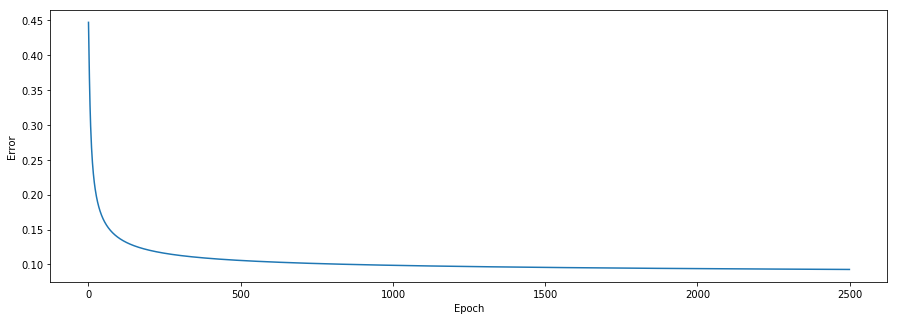

In [12]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()